설 연휴 관련 조사

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [2]:
# 데이터 읽어 오기
df = pd.read_excel("C:\\Users\\dhwhang\\Downloads\\250205_15652_설 연휴 관련 조사 1.xlsx")
df.head()

,ID,UID,STATUS,STARTTIME,ENDTIME,DEVICE,SQ1,SQ2,SQ2_R,SQ2_R_R,...,A4_1,A4_1#ETC_6,A4_1_COPY_1,A4_1_COPY_1#ETC_6,A4_2,A4_2#ETC_6,A5,A6,A7,A8
0,1,100469,COMPLETE,2025-01-22 19:04:21,2025-01-22 19:05:24,PC,1,71,6,6,...,4.0,NaN,NaN,NaN,4.0,NaN,1,2.0,3,3.0
1,2,100536,COMPLETE,2025-01-22 17:22:57,2025-01-22 17:23:46,Mobile/Android,1,69,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3,3.0
2,3,1005774,COMPLETE,2025-01-22 19:21:03,2025-01-22 19:21:35,Mobile/Android,1,54,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,3.0
3,4,101083,COMPLETE,2025-01-22 22:49:42,2025-01-22 22:50:27,Mobile/iPhone,2,43,4,4,...,4.0,NaN,NaN,NaN,4.0,NaN,1,2.0,1,4.0
4,5,101190,COMPLETE,2025-01-23 05:47:11,2025-01-23 05:47:55,Mobile/Android,2,49,4,4,...,7.0,NaN,NaN,NaN,7.0,NaN,1,1.0,3,1.0


In [3]:
# 연령 분포 확인

def demo_age(age):
    if age == 1:
        return '10 ages'
    elif age == 2:
        return '20 ages'
    elif age == 3:
        return '30 ages'
    elif age == 4:
        return '40 ages'
    elif age == 5:
        return '50 ages'
    else:
        return '60 ages over'

In [4]:
def demo_sex(sex):
    if sex == 1:
        return 'male'
    else:
        return 'female'

In [5]:
df['age'] = df['SQ2_R_R'].apply(demo_age)
df['sex'] = df['SQ1'].apply(demo_sex)

df.head()

,ID,UID,STATUS,STARTTIME,ENDTIME,DEVICE,SQ1,SQ2,SQ2_R,SQ2_R_R,...,A4_1_COPY_1,A4_1_COPY_1#ETC_6,A4_2,A4_2#ETC_6,A5,A6,A7,A8,age,sex
0,1,100469,COMPLETE,2025-01-22 19:04:21,2025-01-22 19:05:24,PC,1,71,6,6,...,NaN,NaN,4.0,NaN,1,2.0,3,3.0,60 ages over,male
1,2,100536,COMPLETE,2025-01-22 17:22:57,2025-01-22 17:23:46,Mobile/Android,1,69,6,6,...,NaN,NaN,NaN,NaN,2,NaN,3,3.0,60 ages over,male
2,3,1005774,COMPLETE,2025-01-22 19:21:03,2025-01-22 19:21:35,Mobile/Android,1,54,5,5,...,NaN,NaN,NaN,NaN,2,NaN,1,3.0,50 ages,male
3,4,101083,COMPLETE,2025-01-22 22:49:42,2025-01-22 22:50:27,Mobile/iPhone,2,43,4,4,...,NaN,NaN,4.0,NaN,1,2.0,1,4.0,40 ages,female
4,5,101190,COMPLETE,2025-01-23 05:47:11,2025-01-23 05:47:55,Mobile/Android,2,49,4,4,...,NaN,NaN,7.0,NaN,1,1.0,3,1.0,40 ages,female


In [6]:
df_age = df.groupby([df['sex'],df['age']])[['ID']].count().reset_index()
df_age.rename(columns={'ID': 'count'}, inplace=True)
df_age

,sex,age,count
0,female,10 ages,90
1,female,20 ages,93
2,female,30 ages,89
3,female,40 ages,111
4,female,50 ages,141
5,female,60 ages over,199
6,male,10 ages,43
7,male,20 ages,100
8,male,30 ages,97
9,male,40 ages,113


In [7]:
df_age_pivot = df_age.pivot(index = 'age', columns= 'sex', values= 'count').fillna(0)
df_age_pivot

sex,female,male
age,,
10 ages,90,43
20 ages,93,100
30 ages,89,97
40 ages,111,113
50 ages,141,144
60 ages over,199,192


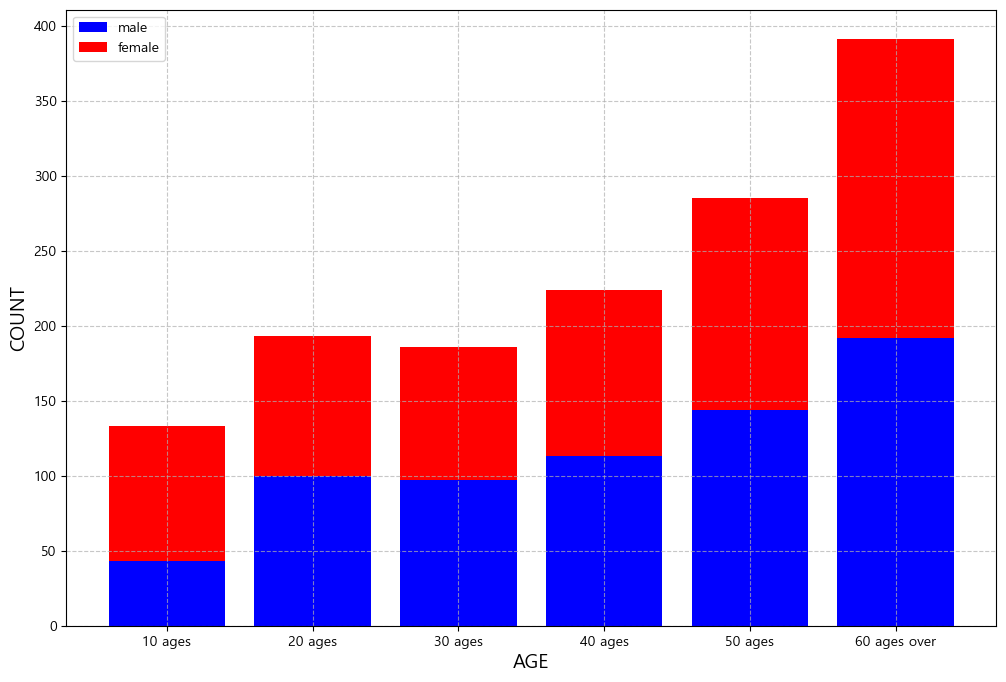

In [8]:
plt.figure(figsize=(12, 8))
plt.bar(df_age_pivot.index, df_age_pivot['male'], label = 'male', color='blue')
plt.bar(df_age_pivot.index, df_age_pivot['female'], bottom=df_age_pivot['male'], label = 'female', color='red')
plt.xlabel('AGE', fontsize=14)
plt.ylabel('COUNT', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# plt.figure(figsize=(12, 8))
# plt.bar(df_age['age'],df_age['count'], label = 'male')
# plt.bar(df_age['age'],df_age['count'], )
# plt.grid(True)
# plt.xlabel('age') ## x축 라벨 출력
# plt.ylabel('count') ## y축 라벨 출력
# plt.show()

In [9]:
def demo_A2(A2):
    if A2 == 1:
        return '계획이 있다'
    elif A2 == 2:
        return '계획이 없다'
    elif A2 == 3:
        return '귀성할 곳이 없다'
    else:
        return '아직 잘 모름'

In [ ]:
# 연령대별 설 연휴에 계획이 있는지 확인
df_age_work = df.groupby([df['age'],df['A2'],df['sex']])[['ID']].count().reset_index()
df_age_work['A2'] = df_age_work['A2'].apply(demo_A2)


df_10age_male_work = df_age_work[(df_age_work['age'] == '10 ages') & (df_age_work['sex'] == 'male')]
df_10age_female_work = df_age_work[(df_age_work['age'] == '10 ages') & (df_age_work['sex'] == 'female')]

df_20age_male_work = df_age_work[(df_age_work['age'] == '20 ages') & (df_age_work['sex'] == 'male')]
df_20age_female_work = df_age_work[(df_age_work['age'] == '20 ages') & (df_age_work['sex'] == 'female')]

df_30age_male_work = df_age_work[(df_age_work['age'] == '30 ages') & (df_age_work['sex'] == 'male')]
df_30age_female_work = df_age_work[(df_age_work['age'] == '30 ages') & (df_age_work['sex'] == 'female')]

df_40age_male_work = df_age_work[(df_age_work['age'] == '40 ages') & (df_age_work['sex'] == 'male')]
df_40age_female_work = df_age_work[(df_age_work['age'] == '40 ages') & (df_age_work['sex'] == 'female')]

df_50age_male_work = df_age_work[(df_age_work['age'] == '50 ages') & (df_age_work['sex'] == 'male')]
df_50age_female_work = df_age_work[(df_age_work['age'] == '50 ages')  & (df_age_work['sex'] == 'female')]

df_60age_male_work = df_age_work[(df_age_work['age'] == '60 ages over') & (df_age_work['sex'] == 'male')]
df_60age_female_work = df_age_work[(df_age_work['age'] == '60 ages over') & (df_age_work['sex'] == 'female')]

In [11]:
df_10age_male_work

,age,A2,sex,ID
1,10 ages,계획이 있다,male,24
3,10 ages,계획이 없다,male,12
5,10 ages,귀성할 곳이 없다,male,3
7,10 ages,아직 잘 모름,male,4


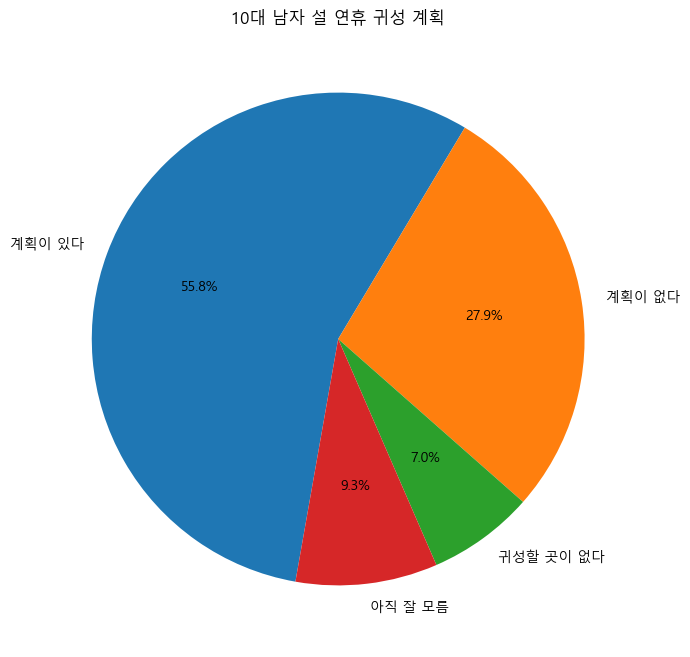

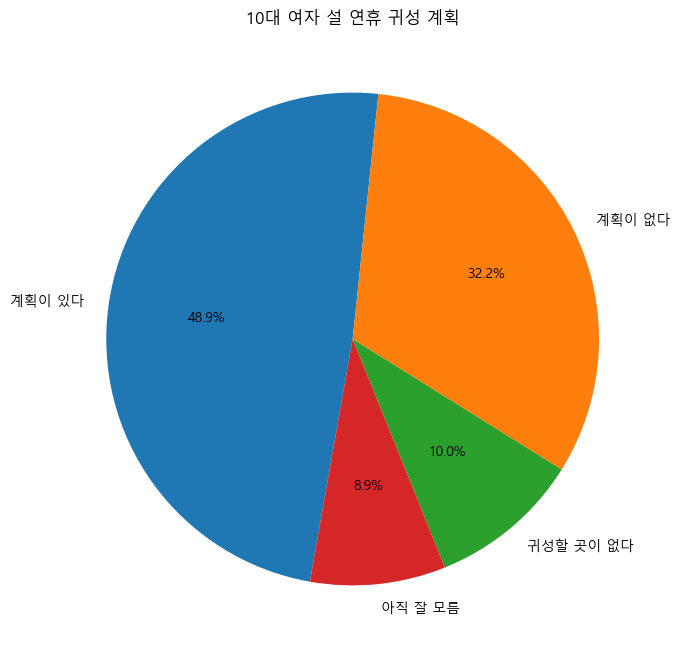

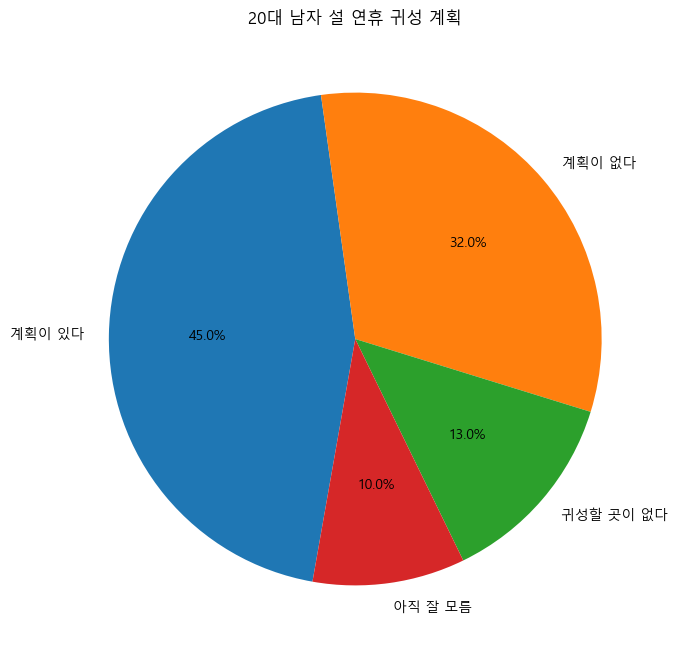

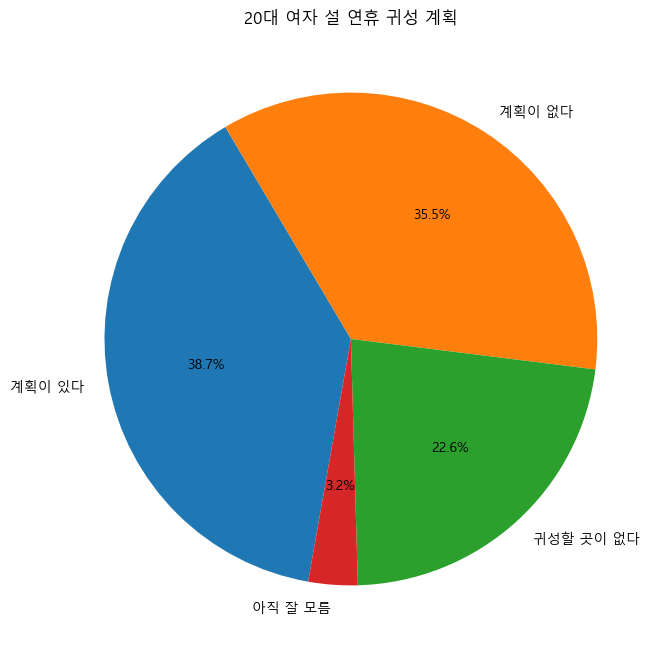

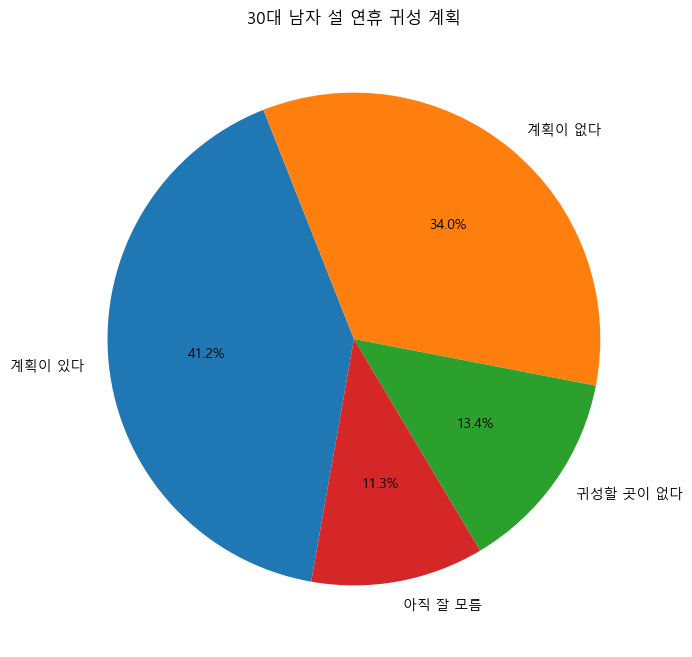

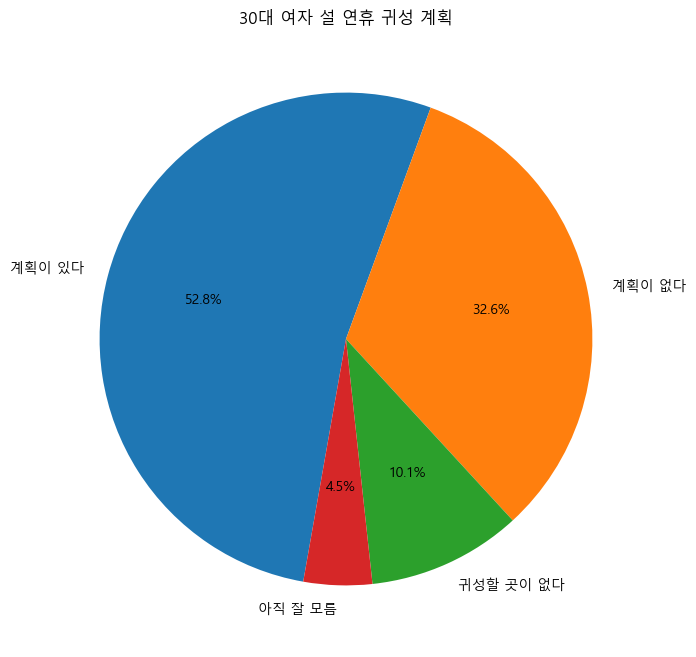

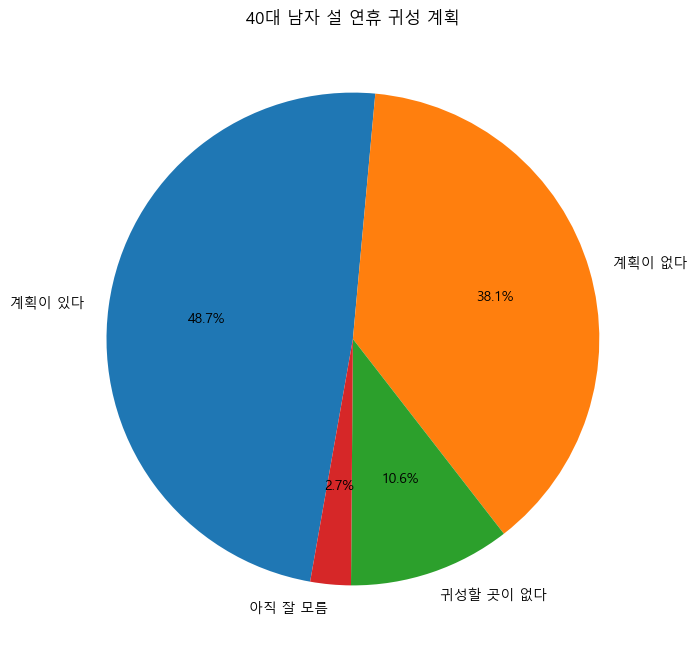

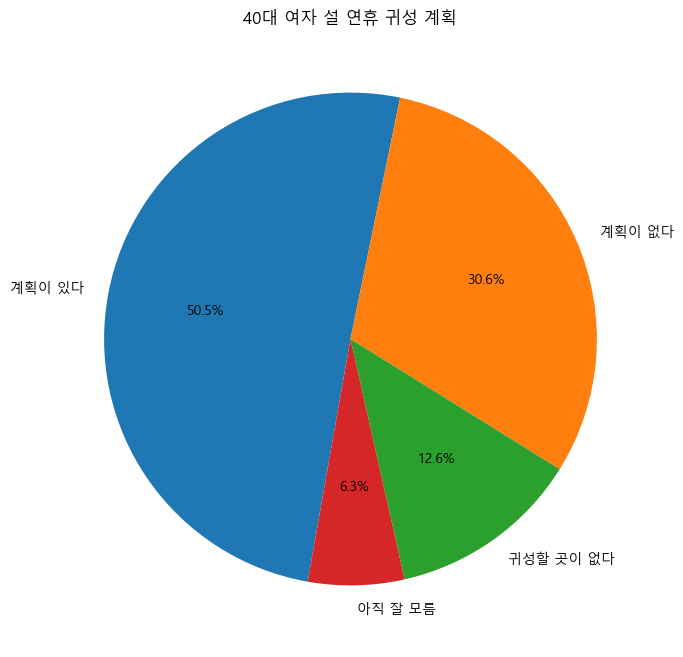

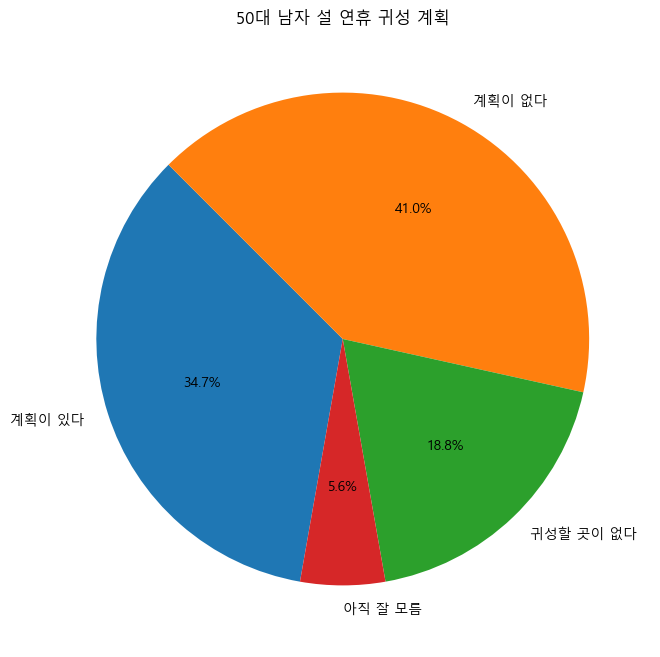

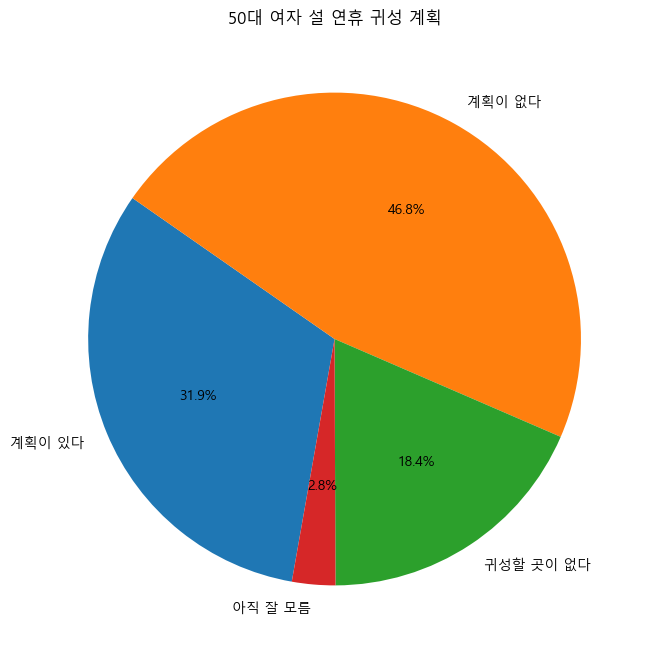

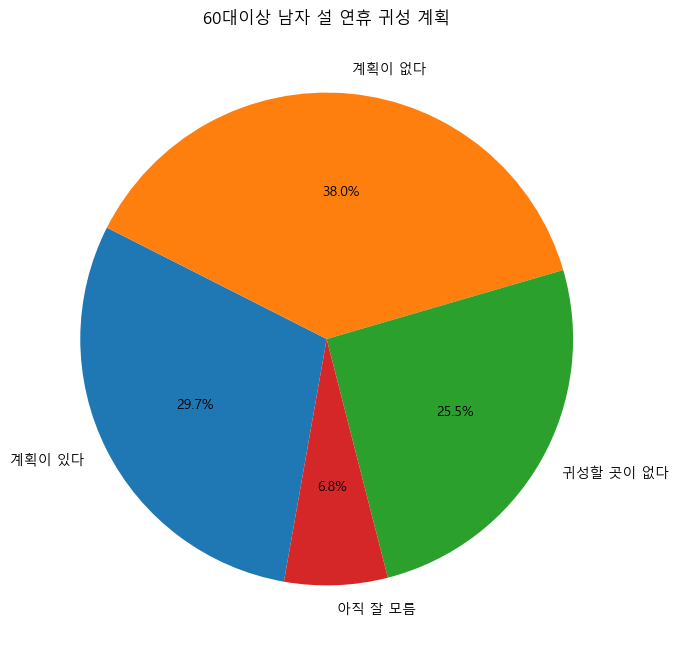

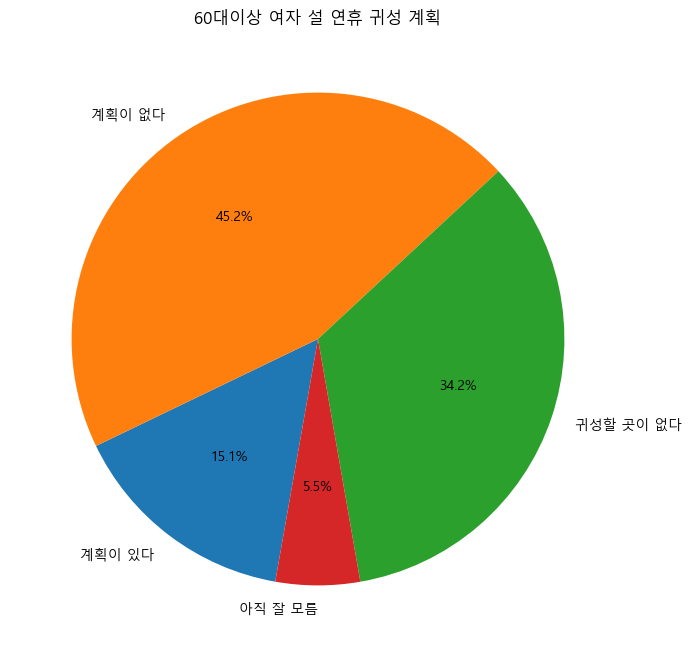

In [12]:
############################10 대################################

plt.figure(figsize=(12, 8))
plt.pie(df_10age_male_work['ID'], labels=df_10age_male_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('10대 남자 설 연휴 귀성 계획')
plt.show()


plt.figure(figsize=(12, 8))
plt.pie(df_10age_female_work['ID'], labels=df_10age_male_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('10대 여자 설 연휴 귀성 계획')
plt.show()

############################20 대################################

plt.figure(figsize=(12, 8))
plt.pie(df_20age_male_work['ID'], labels=df_20age_male_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('20대 남자 설 연휴 귀성 계획')
plt.show()


plt.figure(figsize=(12, 8))
plt.pie(df_20age_female_work['ID'], labels=df_20age_female_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('20대 여자 설 연휴 귀성 계획')
plt.show()

############################30 대################################

plt.figure(figsize=(12, 8))
plt.pie(df_30age_male_work['ID'], labels=df_30age_male_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('30대 남자 설 연휴 귀성 계획')
plt.show()

plt.figure(figsize=(12, 8))
plt.pie(df_30age_female_work['ID'], labels=df_30age_female_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('30대 여자 설 연휴 귀성 계획')
plt.show()


############################40 대################################

plt.figure(figsize=(12, 8))
plt.pie(df_40age_male_work['ID'], labels=df_40age_male_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('40대 남자 설 연휴 귀성 계획')
plt.show()

plt.figure(figsize=(12, 8))
plt.pie(df_40age_female_work['ID'], labels=df_40age_female_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('40대 여자 설 연휴 귀성 계획')
plt.show()


############################50 대################################

plt.figure(figsize=(12, 8))
plt.pie(df_50age_male_work['ID'], labels=df_50age_male_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('50대 남자 설 연휴 귀성 계획')
plt.show()

plt.figure(figsize=(12, 8))
plt.pie(df_50age_female_work['ID'], labels=df_50age_female_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('50대 여자 설 연휴 귀성 계획')
plt.show()


############################60 대################################

plt.figure(figsize=(12, 8))
plt.pie(df_60age_male_work['ID'], labels=df_60age_male_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('60대이상 남자 설 연휴 귀성 계획')
plt.show()

plt.figure(figsize=(12, 8))
plt.pie(df_60age_female_work['ID'], labels=df_60age_female_work['A2'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('60대이상 여자 설 연휴 귀성 계획')
plt.show()


In [13]:
# 거주 지역별 귀성할 곳 비교

## A3에 응답값이 없는 데이터 삭제
df_area = df[['ID','SQ3','A3']] 
df_real_area = df_area.dropna()
df_real_area['A3'] = df_real_area['A3'].astype(int)

C:\Users\dhwhang\AppData\Local\Temp\ipykernel_24372\2448386019.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_area['A3'] = df_real_area['A3'].astype(int)


In [14]:
# 지역 라벨 입히기
def bon_area(number):
    if number == 1:
        return '서울'
    elif number == 2:
        return '부산'
    elif number == 3:
        return '대구'
    elif number == 4:
        return '인천'
    elif number == 5:
        return '광주'
    elif number == 6:
        return '대전'
    elif number == 7:
        return '울산'
    elif number == 8:
        return '경기'
    elif number == 9:
        return '충청'
    elif number == 10:
        return '경상'
    elif number == 11:
        return '전라'
    elif number == 12:
        return '강원'
    else:
        return '제주'


In [15]:
df_real_area['A3'] = df_real_area['A3'].apply(bon_area)
df_real_area['SQ3'] = df_real_area['SQ3'].apply(bon_area)

C:\Users\dhwhang\AppData\Local\Temp\ipykernel_24372\1697869816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_area['A3'] = df_real_area['A3'].apply(bon_area)
C:\Users\dhwhang\AppData\Local\Temp\ipykernel_24372\1697869816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_area['SQ3'] = df_real_area['SQ3'].apply(bon_area)


In [34]:
df_real_area_type = df_real_area.groupby([df_real_area['SQ3'],df_real_area['A3']])['ID'].count().reset_index()
df_real_area_type.rename(columns = {'ID': 'Count', 'SQ3' : '출발 지점', 'A3':'도착 지점'} , inplace=True)
df_real_area_type

,출발 지점,도착 지점,Count
0,강원,강원,1
1,강원,경기,1
2,강원,경상,3
3,강원,대구,1
4,강원,대전,1
...,...,...,...
93,충청,울산,1
94,충청,인천,4
95,충청,전라,12
96,충청,제주,1


In [35]:
df_real_area_by_area  = df_real_area_type.pivot(index = '출발 지점', columns = '도착 지점', values = 'Count').fillna(0)
df_real_area_by_area.style.background_gradient(cmap='RdYlGn_r')




도착 지점,강원,경기,경상,광주,대구,대전,부산,서울,울산,인천,전라,제주,충청
출발 지점,,,,,,,,,,,,,
강원,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,11.000000
경기,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
경상,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000
광주,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000
대구,0.000000,1.000000,11.000000,0.000000,11.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
대전,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.000000
부산,1.000000,0.000000,6.000000,2.000000,3.000000,0.000000,25.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
서울,11.000000,13.000000,8.000000,2.000000,3.000000,3.000000,3.000000,31.000000,1.000000,3.000000,10.000000,0.000000,9.000000
울산,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,3.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000
